<a href="https://colab.research.google.com/github/Jonny-T87/Dojo-Work/blob/main/2_Mock_Belt_Exam_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jonny Tesfahun

- 07/20/22

##Problem
An airline company would like to know more about their customers and how to please them.  They have provided some information about 20,000 customers as well as the results of a satisfaction survey.  The data is available here.

They would like you to:

1. Segment the customers into groups and describe those groups, what they have in common and how they differ.

2. Model the data to see if overall customer satisfaction can be predicted by information about their flights and answers to the survey other than overall satisfaction.

Clustering instructions:
The airline company would like you to segment the customers and create an analytical report on the clusters describing each group and describing how they are different.

1. Load the dataset.

2. Explore the data.

3. Prepare the data for modeling.

4. Use a KMeans model to cluster the passengers into an optimal number of clusters. 

  Use an elbow plot and silhouette score to find the optimal number of clusters.
  There must be between 2 and 10 clusters.
5. Analyze and report on the clusters.

Describe each cluster.

  How are the clusters different?

  - Create 2 report quality explanatory visualizations showing important differences between the clusters.
  - Interpret and explain each visualization.
Modeling Instructions:
  - The airline would also like to know how well overall satisfaction can be predicted from information about passengers and satisfaction with specific parts of their experience. Your target will be the 'satisfied' column.

1. Use random_state = 42 for your train_test_split.

2. Apply PCA to reduce the number of features to a more reasonable number.

  Report how many fewer columns are present after PCA.
  Report the amount of variance retained after PCA.
3. Do not leak data.

4. Use a deep learning model to predict whether customers will report that they were satisfied.

  Create 3 different versions of a sequential model.
Each new model should be an iteration of the previous model.
 Justify in writing why you changed what you did for each new model.
For example, why did you add layers, regularization, nodes, etc?
  Use some form of regularization with at least one model.
  Evaluate each model with appropriate metrics.
5. Choose a final model, and justify your choice.

6. Explain in writing how well your model will solve the business problem.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DojoBootCamp/Project Files/flight_df - flight_df.csv')
df.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,3,2,0,0,0,1,1,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,4,18,2,0,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,4,5,3,0,0,1,1,0,0
3,54,3,453,3,5,5,5,3,4,4,...,3,4,3,1,91,80,0,1,1,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,3,4,0,0,1,1,1,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,39.477250,2.027800,1188.548000,2.727950,3.056100,2.751100,2.971350,3.202100,3.255300,3.439100,...,3.623650,3.302850,3.635550,3.282650,14.318350,14.698250,0.490650,0.817850,0.687900,0.43305
std,15.108901,0.963054,1001.136957,1.326886,1.531134,1.396799,1.279575,1.332383,1.348485,1.323434,...,1.186837,1.259131,1.184017,1.311734,36.451829,36.899857,0.499925,0.385978,0.463362,0.49551
min,7.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,27.000000,1.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
50%,40.000000,2.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
75%,51.000000,3.000000,1733.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,1.000000,1.00000
max,85.000000,3.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                20000 non-null  int64
 1   Class                              20000 non-null  int64
 2   Flight Distance                    20000 non-null  int64
 3   Inflight wifi service              20000 non-null  int64
 4   Departure/Arrival time convenient  20000 non-null  int64
 5   Ease of Online booking             20000 non-null  int64
 6   Gate location                      20000 non-null  int64
 7   Food and drink                     20000 non-null  int64
 8   Online boarding                    20000 non-null  int64
 9   Seat comfort                       20000 non-null  int64
 10  Inflight entertainment             20000 non-null  int64
 11  On-board service                   20000 non-null  int64
 12  Leg room service  

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [ ]:
#kmeans = KMeans(n_clusters=2)
#kmeans.fit(scaled_df)

Text(0, 0.5, 'inertia')

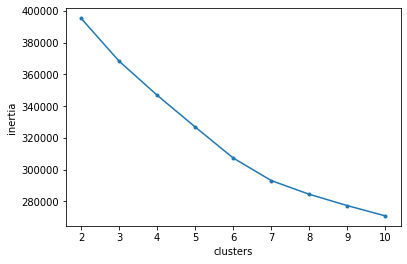

In [ ]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(scaled_df)
  inertias.append(kmeans.inertia_)  
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')


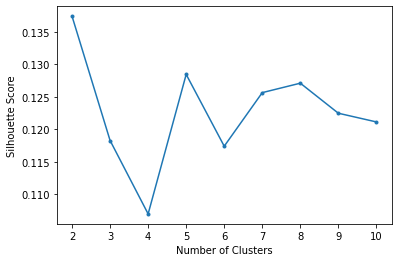

In [ ]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [ ]:
# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_df)

KMeans(n_clusters=2, random_state=42)

In [ ]:
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()


,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied,cluster
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,2,0,0,0,1,1,0,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,18,2,0,1,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,5,3,0,0,1,1,0,0,0
3,54,3,453,3,5,5,5,3,4,4,...,4,3,1,91,80,0,1,1,0,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,4,0,0,1,1,1,0,0


In [ ]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,0,37.205982,1.599413,908.847142,2.302505,3.013304,2.452610,2.936783,2.719699,2.576750,...,3.230755,2.975961,3.247362,2.69878,15.754014,16.373888,0.477291,0.756583,0.533535,0.105514
1,1,42.197231,2.540820,1523.506757,3.237446,3.107351,3.108559,3.012746,3.779804,4.067905,...,4.094165,3.694319,4.100429,3.98187,12.599055,12.691572,0.506648,0.891221,0.872761,0.825294


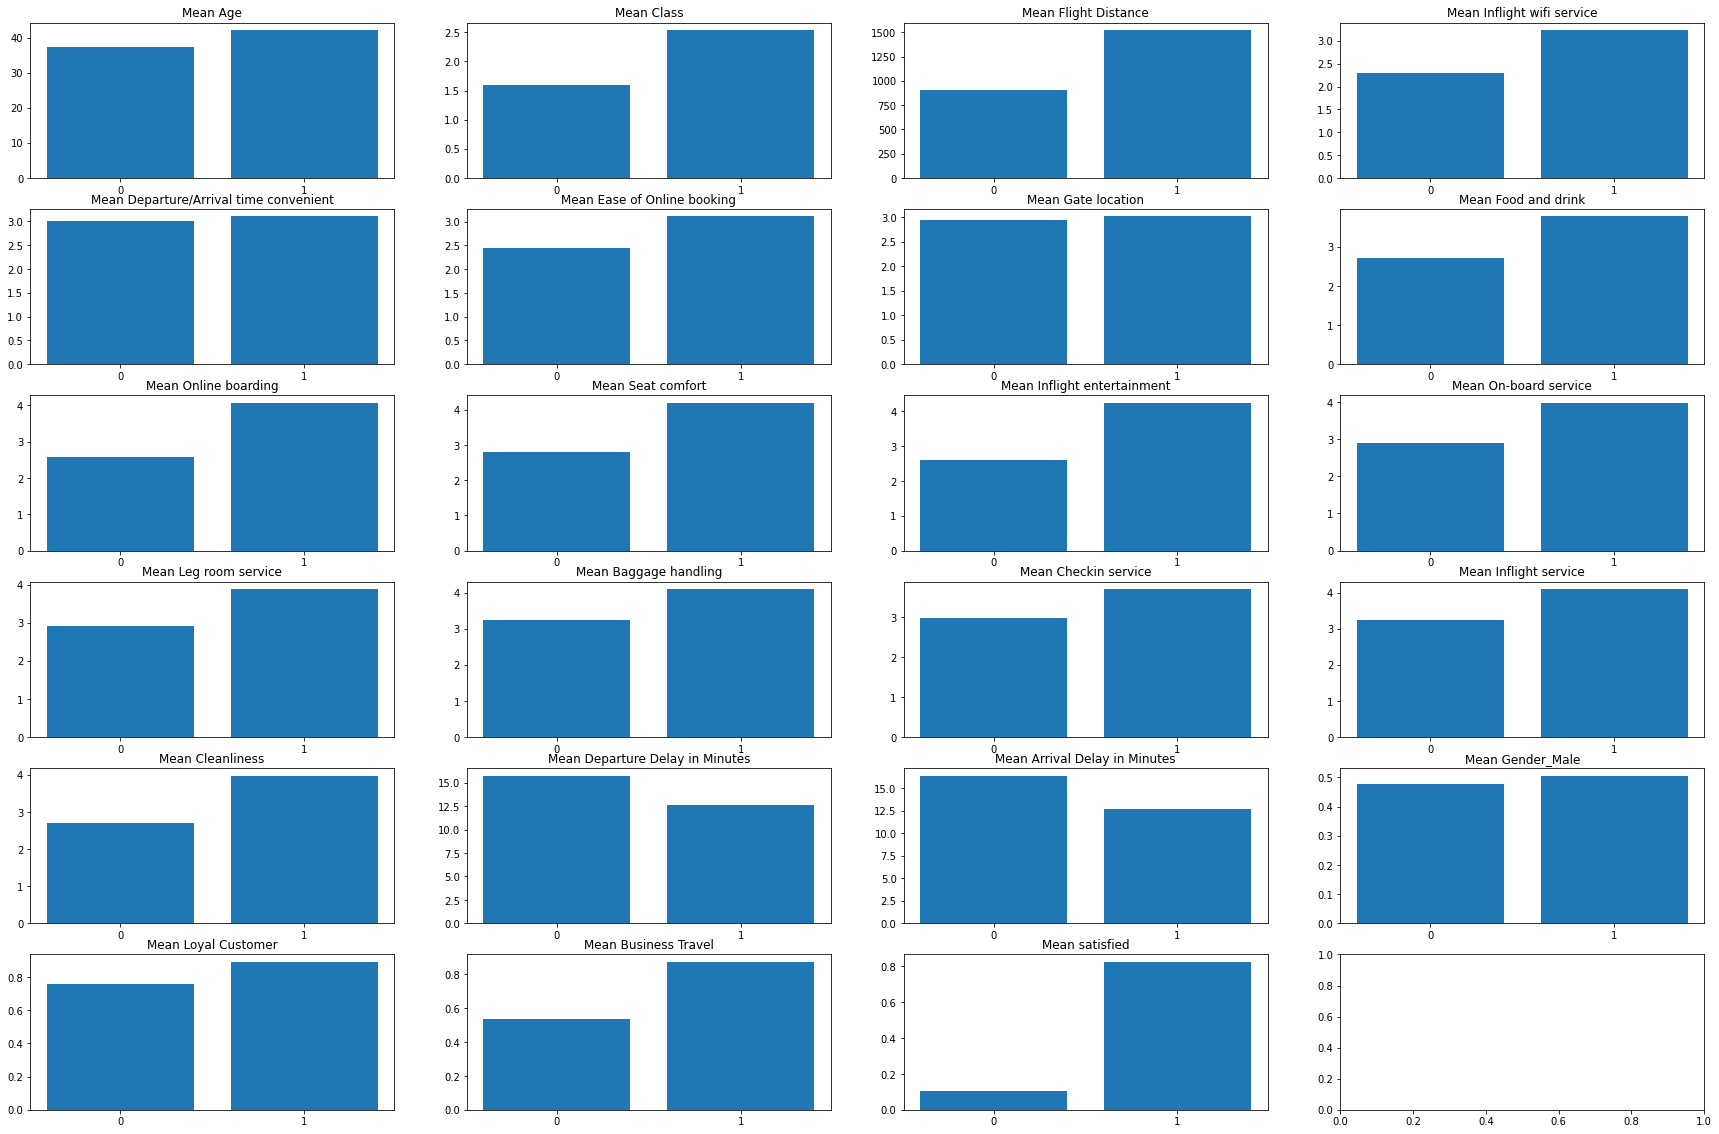

In [ ]:
# Visualize means 
#source class codealong
fig, axes = plt.subplots(6,4, figsize = (30, 20))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')
  axes[i].set_xticks(cluster_groups['cluster'])


- Cluster 0:
Cluster 0 has a high child mortality rate, but also a significantly higher average income than cluster 1. Life expectancy is closer to clusters 2 and 3, but still significantly lower.  Clusters 0 and 1 are similar, but nations in cluster 0 seem to tend to be a little more developed and may have some industrialization or natural resources to trade to other nations.  Cluster 0 has similar exports to Cluster 2, Despite a lower average income and GDP per person.  In addition to cluster 1, these nations may also be good candidates for charitable activities by the stakeholders.  They do seem to be in a slightly better position, however. 

- Cluster 1:
 Cluster 1 has the highest child mortality rate, least exports, lowest average income, highest inflation, lowest life expectancy, highest fertility rate and lowest GDP per person.  While their exports are much lower than the other clusters, their imports rates are similar to clusters 0 and 2.  This may mean that they are dependent on foreign goods, but do not produce a lot of goods for export.  The populations in these nations tend to be desperately impoverished and unhealthy.  This cluster might be a good candidate for our stakeholder’s efforts.   

- Cluster 2: 
Cluster 2 nations have considerably lower imports and exports than cluster 3, but are similar in child mortality and inflation rates, both being low.  While individuals in these nations have somewhat lower incomes than cluster 3 and the GDP per person is lower, they seem to be healthier.  These nations seem to be more self-sufficient, less dependent on foreign trade, but have generally healthy and comfortable populations.  These would not be candidates for charitable activities. 

- Cluster 3:
Cluster 3 has the lowest child mortality rate, the most exports and imports, the highest income, least inflation, highest life expectancy, lowest fertility rate, and highest GDP per person.  From what we know of the world we might expect these to be first world, industrialized nations that are deeply involved in international trade.  These would not be good candidates for charitable activities by the stakeholders.

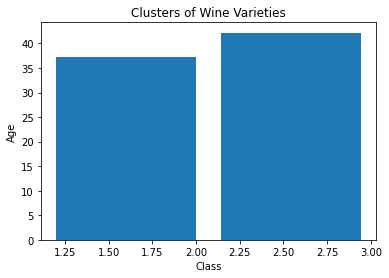

In [ ]:
# Save the cluster labels to the dataframe 
df['cluster'] = kmeans.labels_
One = cluster_groups['cluster'] == 1
# Visualize the clusters
plt.bar(cluster_groups['Class'], cluster_groups['Age'])
plt.xlabel('Class')
plt.ylabel('Age')
plt.title('Clusters of Wine Varieties');


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


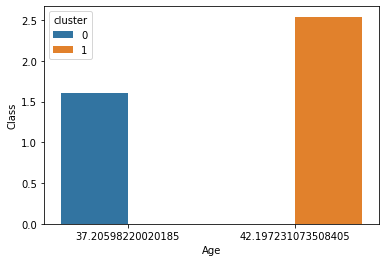

In [ ]:
sns.barplot(cluster_groups['Age'], cluster_groups['Class'], hue= cluster_groups['cluster'])

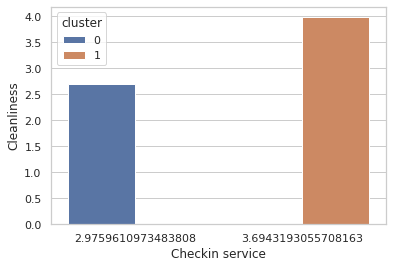

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Checkin service", y="Cleanliness", data=cluster_groups, hue= "cluster")

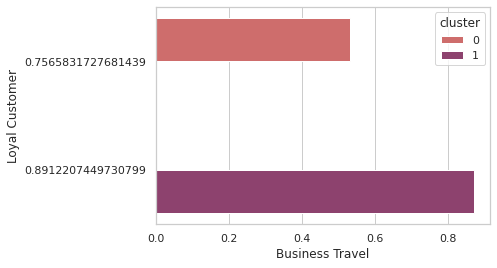

In [ ]:
ax = sns.barplot(x="Business Travel", y="Loyal Customer", data=cluster_groups, hue= cluster_groups['cluster'],
                 palette="flare", capsize=.2, orient="h")


##PArt 2
Modeling

In [ ]:
X = df.drop(columns= ['satisfied','cluster'])
y = df['satisfied']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X_train

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel
5514,48,3,541,1,1,1,1,4,5,4,...,4,4,5,4,3,0,0,0,1,1
1266,26,1,862,1,1,1,1,1,3,3,...,3,1,3,5,3,146,135,1,0,1
5864,55,1,500,4,2,2,2,4,4,4,...,4,4,1,4,4,8,6,1,1,1
15865,38,1,984,4,4,4,1,1,4,1,...,2,2,2,2,1,92,75,1,0,1
12892,80,3,531,3,3,3,4,5,3,4,...,3,2,2,2,3,0,13,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,36,3,2925,2,3,3,3,1,4,3,...,2,2,4,2,1,0,0,1,1,1
11964,49,3,308,5,5,5,5,2,5,4,...,4,4,4,4,3,0,0,1,1,1
5390,21,1,258,0,0,0,4,3,0,3,...,2,5,4,4,3,0,0,0,0,1
860,55,3,3413,5,3,3,3,5,3,3,...,4,5,1,5,2,0,4,1,1,1


In [ ]:
X

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,3,3,2,0,0,0,1,1
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,4,4,18,2,0,1,1
2,28,1,188,3,5,3,4,3,3,3,...,3,4,4,5,3,0,0,1,1,0
3,54,3,453,3,5,5,5,3,4,4,...,3,3,4,3,1,91,80,0,1,1
4,40,1,775,4,3,3,3,4,4,4,...,1,3,3,3,4,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,10,2,820,5,3,2,2,5,5,4,...,5,4,5,5,5,0,0,0,1,1
19996,27,3,2676,4,3,3,3,4,4,4,...,3,3,1,4,4,0,0,0,1,1
19997,39,1,197,2,5,2,1,4,2,4,...,2,4,3,5,4,25,18,1,1,0
19998,17,3,3340,2,5,5,5,2,2,2,...,3,4,2,3,2,2,0,0,1,1


In [ ]:
X.shape

(20000, 22)

In [ ]:
MinM = MinMaxScaler()

In [ ]:
X_scaled = MinM.fit_transform(X)

In [ ]:
pca = PCA(n_components=.65, random_state=42)
pcs = pca.fit_transform(X_scaled)

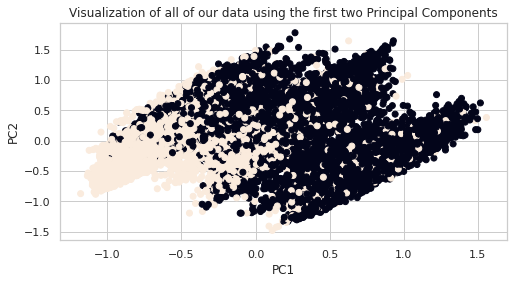

In [ ]:
# Visualize the first 2 PCs
#source learn platform 
plt.figure(figsize = (8, 4))
plt.scatter(pcs[:,0], pcs[:,1], c = y)
plt.title('Visualization of all of our data using the first two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2');


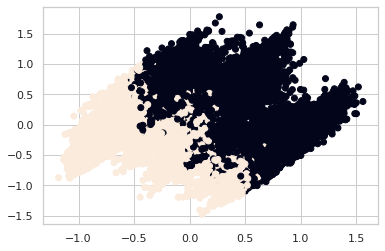

In [ ]:
plt.scatter(pcs[:,0], pcs[:,1], c=kmeans.labels_)

In [ ]:
# Instantiate & fit data using PCA
#pcaT = PCA()
#pcaT.fit(X_scaled)

In [ ]:
print(f"explained_variance {pca.explained_variance_}")
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

explained_variance [0.41735515 0.2696326  0.24998878 0.18239808 0.17359903 0.16353048]
[0.20823165 0.13452821 0.12472729 0.09100416 0.08661403 0.08159052]
[0.20823165 0.34275987 0.46748716 0.55849132 0.64510535 0.72669586]


In [ ]:
#pca.explained_variance_ratio_
#source = https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5),
       "\nExplained Variance Ratio", pca.explained_variance_ratio_.cumsum())

Components =  6 ;
Total explained variance =  0.7267 
Explained Variance Ratio [0.20823165 0.34275987 0.46748716 0.55849132 0.64510535 0.72669586]


##PArt 3
Modeling 2
Binary Classification

In [ ]:
scaler_Pca = make_pipeline(MinMaxScaler(), PCA(n_components=.65, random_state=42))
                           #KMeans(n_clusters=6, random_state=42))
#Can add to model

In [ ]:
X_train_sc = scaler_Pca.fit_transform(X_train)
X_test_sc = scaler_Pca.fit_transform(X_test)

In [ ]:
##1st Model shape
input_shape = pcs.shape[1]
input_shape

6

In [ ]:
#1st model
A_model = Sequential()

In [ ]:
# create model architecture
 
A_model.add(Dense(10, input_dim=input_shape, activation='relu'))
A_model.add(Dense(10, activation='relu'))
A_model.add(Dense(1, activation='sigmoid'))


In [ ]:
# compile model with metrics
A_model.compile(loss='bce', optimizer='adam', metrics=['accuracy',
                                                         metrics.Precision(),
                                                         metrics.Recall()])

In [ ]:
history = A_model.fit(X_train_sc, y_train,
                        validation_data=(X_test_sc, y_test),
                        epochs=15,
                        verbose=0)


In [ ]:
# Learning history plotting function
#Source Learn platform
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()


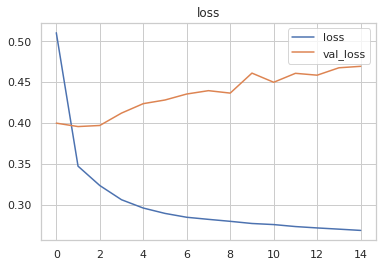

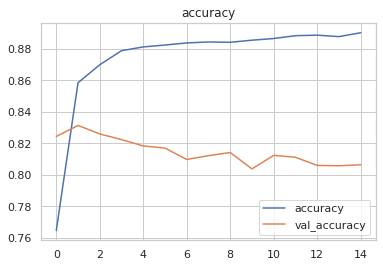

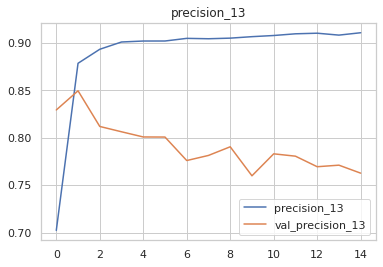

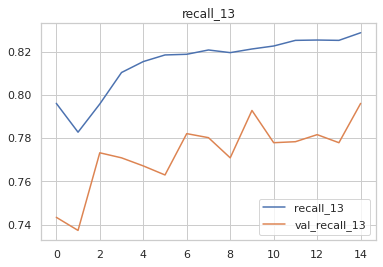

In [ ]:
# plot learning history
plot_history(history)
